In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("E:\\Datatrained projects\\happiness_score_dataset.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
dfcolums=["Country","Region","Happiness Score","Economy (GDP per Capita)","Family","Freedom","Trust (Government Corruption)","Generosity"]

In [5]:
df=df[dfcolums].copy()

In [6]:
df.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.63297,0.32957,0.45811


In [12]:
df = df.rename(columns={'Trust (Government Corruption)': 'Trust',"Economy (GDP per Capita)":"GDP","Happiness Score":"happy_score"})

In [13]:
df.head()

,Country,Region,happy_score,GDP,Family,Freedom,Trust,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.63297,0.32957,0.45811


In [14]:
df.isnull().sum()

Country        0
Region         0
happy_score    0
GDP            0
Family         0
Freedom        0
Trust          0
Generosity     0
dtype: int64

In [15]:
df.describe()

,happy_score,GDP,Family,Freedom,Trust,Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,0.669730,0.551910,0.795880


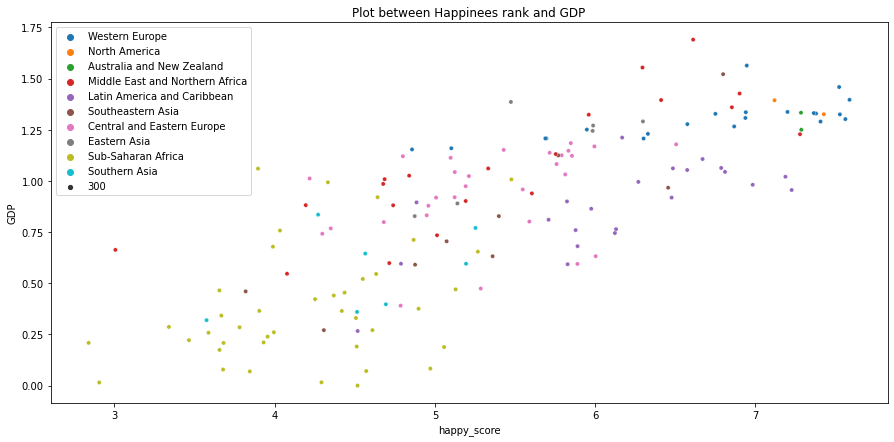

In [22]:
plt.figure(figsize=(15,7))
plt.title("Plot between Happinees rank and GDP")
sns.scatterplot(x=df.happy_score  ,y=df.GDP,hue=df.Region,size=300)
plt.legend()

In [31]:
#Total number of countries in each region 
county_region=df.groupby("Region")["Country"].count()

In [32]:
county_region

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Country, dtype: int64

In [35]:
cor=df.corr()

In [36]:
cor

,happy_score,GDP,Family,Freedom,Trust,Generosity
happy_score,1.000000,0.780966,0.740605,0.568211,0.395199,0.180319
GDP,0.780966,1.000000,0.645299,0.370300,0.307885,-0.010465
Family,0.740605,0.645299,1.000000,0.441518,0.205605,0.087513
Freedom,0.568211,0.370300,0.441518,1.000000,0.493524,0.373916
Trust,0.395199,0.307885,0.205605,0.493524,1.000000,0.276123
Generosity,0.180319,-0.010465,0.087513,0.373916,0.276123,1.000000


<AxesSubplot:>

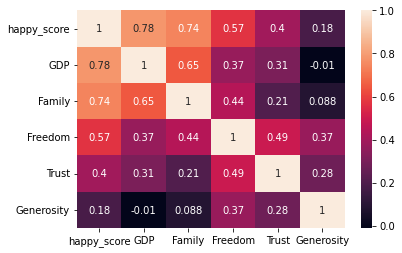

In [40]:
sns.heatmap(cor,annot=True)

In [46]:
#To know how corrupt the goverment is 
corrup_region=df.groupby("Region")[["Trust"]].mean()


In [47]:
corrup_region

,Trust
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


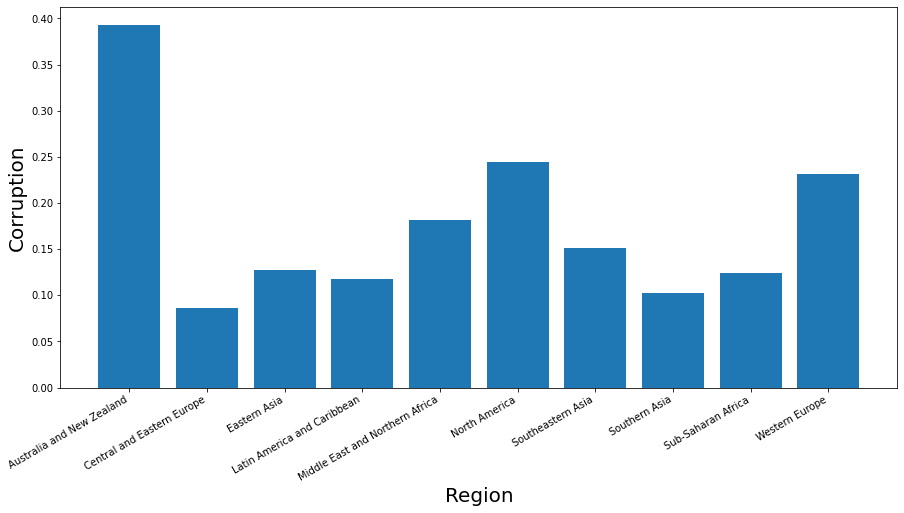

In [59]:
plt.figure(figsize=(15,7))
plt.bar(corrup_region.index,corrup_region.Trust)
plt.xticks(rotation=30,ha="right")
plt.xlabel("Region",fontsize=20)
plt.ylabel("Corruption",fontsize=20)
plt.show()